In [0]:
#http://www.pyrunner.com/weblog/2016/07/25/dmd-python/#fn:1
#https://dsweb.siam.org/Software/pydmd-python-dynamic-mode-decomposition#dsds
#https://mathlab.github.io/PyDMD/build/html/index.html
#https://github.com/google/jax

![picture](https://drive.google.com/uc?id=1CGJ5PIO273yxe25N8plZGvvUJBMzeDvJ)

- How to upload picture in colab:

https://towardsdatascience.com/the-2-step-guide-to-upload-images-in-google-colab-b51348e882e4

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [0]:
#         #Generating dataset 
# x = np.linspace(-10,10,100)
# t = np.linspace(0,6*pi,80)

# dt = t[2] - t[1]
# X1,T1 = np.meshgrid(x,t)

#       #Creating 3-spatiotemperal pattern
# p1 = np.multiply(20-0.2*power(X1, 2), exp((2.3j)*T1))
# p2 = np.multiply(X1, exp(0.6j*T1))
# p3 = np.multiply(5*np.multiply(1/cosh(X1/2), tanh(X1/2)), 2*exp((0.1+2.8j)*T1))

#         #combine signals and make data matrix
# D = (p1 + p2 + p3).T

#         #create DMD input-output matrices
# X = D[:,:-1]
# Y = D[:,1:]

# U2,Sig2,Vh2 = svd(X, False)

In [0]:
pip install pydmd

In [0]:
#pip install git+https://github.com/mathLab/PyDMD.git

![picture](https://drive.google.com/uc?id=1e_crkGC3dVFcrcHJaLiQGghcVv7IhACF)

In [0]:
from  pydmd import DMD

In [0]:
x = np.linspace(-5,5,128)       #space, x_dimension = 128
t = np.linspace(0,4*np.pi,256)  #time, t_dimension = 256

xgrid,tgrid = np.meshgrid(x,t)
#The numpy.meshgrid function is used to create a rectangular 
#grid out of two given one-dimensional arrays representing 
#the Cartesian indexing or Matrix indexing


In [0]:
#f1 = sech(x+3)exp(i2.3t)......i == complex number representation
#sec = 1/cosh(x)
def f1(x,t):
  f1 =  (np.cosh(x+3)**(-1))*(np.exp(2.3j*t)) 
  return f1  

#f2 = 2sech(x)tanh(x)exp(i2.8t)....
def f2(x,t):
  f2 =  2*(np.cosh(x)**(-1))*(np.tanh(x))*(np.exp(2.8j*t)) 
  return f2    

In [0]:
X1 = f1(xgrid,tgrid)
X2 = f2(xgrid,tgrid)

X = X1 + X2 

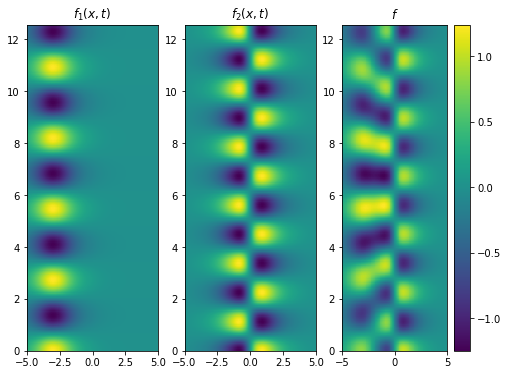

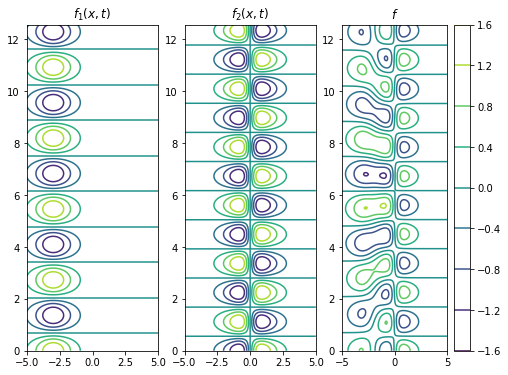

In [0]:
#plotting the functions and the dataset
title = ['$f_1(x,t)$','$f_2(x,t)$','$f$']
data = [X1,X2,X]
fig = plt.figure(figsize=(8,6))
for n,t_,d in zip(range(131,134),title,data):
  plt.subplot(n)
  plt.pcolor(xgrid,tgrid,d.real)  #the colour plot
  #plt.contour(xgrid,tgrid,d.real)  #the contour plot
  plt.title(t_)
plt.colorbar()
plt.show()



#plotting the functions and the dataset
title = ['$f_1(x,t)$','$f_2(x,t)$','$f$']
data = [X1,X2,X]
fig = plt.figure(figsize=(8,6))
for n,t_,d in zip(range(131,134),title,data):  #using "zip" to iterate through multiple lists in parallel
  plt.subplot(n)
  #plt.pcolor(xgrid,tgrid,d.real)  #the colour plot
  plt.contour(xgrid,tgrid,d.real)  #the contour plot
  plt.title(t_)
plt.colorbar()
plt.show()



In [0]:
#X = Input matrix, the rows of X contans the temporal snapshots  
X.shape

(256, 128)

In [0]:
#since the the matrix need to be arranged by columns,we take transpose
X.T.shape   # ---> (space, time)

(128, 256)

- Compute the truncated SVD of the matrix.

- Truncated SVD is different from regular SVDs in that:

- It ***produces a factorization where the number of columns is equal to the specified truncation***. 

- For example, given an n x n matrix, SVD will produce matrices with n columns, whereas truncated SVD will produce matrices with the specified number of columns. This is how the dimensionality is reduced.

- [More info here](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781783989485/1/ch01lvl1sec21/using-truncated-svd-to-reduce-dimensionality)

In [0]:
#we compute the truncated SVD....NOT REGULAR 
sys_DMD1 = DMD(svd_rank=2)   #we retun 2-columns
sys_DMD1.fit(X.T)

- The dmd object contains the principal information about the decomposition:

- The attribute ***modes*** is a 2D numpy array where the columns are the low-rank structures individuated;

- The attribute ***dynamics*** is a 2D numpy array where the rows refer to the time evolution of each mode;

- The attribute ***eigs*** refers to the eigenvalues of the low dimensional operator;

- The attribute ***reconstructed_data*** refers to the approximated system evolution.


In [0]:
#Mode of the system....
sys_Mode = sys_DMD1.modes
sys_Mode.shape                #The columns gives the mode...

(128, 2)

In [0]:
sys_Mode.T.shape  #2 - Modes

(2, 128)

In [0]:
sys_Dynamics = sys_DMD1.dynamics 
sys_Dynamics.shape  

(2, 256)

In [0]:
#Visualization of the system Mode
legend = ["Mode_1","Mode_2"]
for m in sys_Mode.T:        #notice the "sys_Mode.T",
  plt.plot(x,m.real)        #m.real ---> means we use the real part (not the imaginary part)
  plt.title("Modes")
  plt.legend(legend)
plt.show()

NameError: ignored

 - Notice the "sys_Mode.T", this allows us to access the colum during the plot so we switched columns to row 

- The columns represent the modes 

In [0]:
sys_Dynamics.shape

(2, 256)

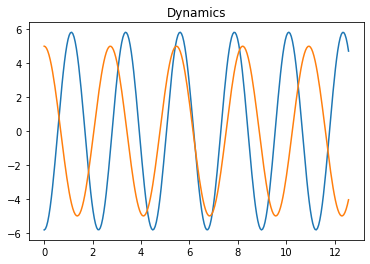

In [0]:
for d in sys_Dynamics:  #No transpose here, the row represent time evolution of the modes
  plt.plot(t,d.real)    #plotting (t,d.real)--> dynamics shows the time evolution of the modes
  plt.title("Dynamics")
plt.show()

- Time evolution of the modes..

- Checking for the stability of the Modes vis the eigenvalues

- if an eigenvalue is **on the unit circle**, the corresponding mode will be **stable**

- while if an eigenvalue **is inside the unit circle**, the mode will converge 

- and if the eigenvalue **is  outside the unit circle**, the mode will diverge.



In [0]:
#we only have 2-eigen values
sys_DMD1.eigs

array([0.99049535+0.13754624j, 0.99358347+0.11310121j])

In [0]:
e1 = sys_DMD1.eigs[0]
e2 = sys_DMD1.eigs[1]

In [0]:
#evaluating distance of each eigenvaue from the unit circle
eigens = [e1,e2]
for e in eigens:   #approximated
  print('Eigenvalue {}: distance from unit circle {}'.format(e, round(np.abs((e.imag**2+e.real**2)- 1),2)))

Eigenvalue (0.9904953470777572+0.13754623737970062j): distance from unit circle 0.0
Eigenvalue (0.9935834726096823+0.11310120669950191j): distance from unit circle 0.0


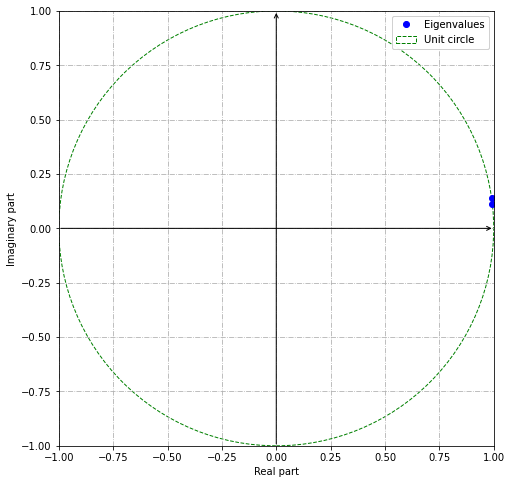

In [0]:
#using the "plot_eigs" 
sys_DMD1.plot_eigs(show_axes=True, show_unit_circle=True)  #plotting on a unit_circle

- As shown above, the eigenvalues lies on the unit circle, this indicate that the modes are stable.

- Finally, we can reconstruct the original dataset as the product of **modes** and **dynamics**

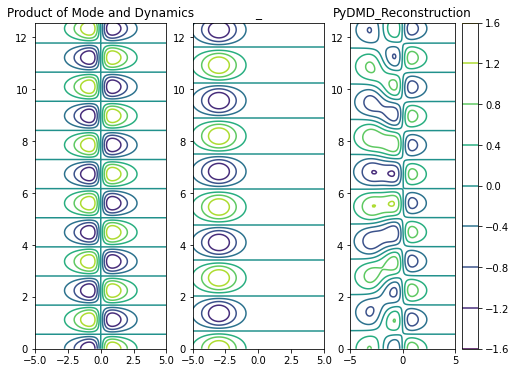

In [0]:
#Reconstruction from product of "Mode" and "Dynamics"
fig = plt.figure(figsize=(8,6))
title = ["Product of Mode and Dynamics", "_"]
for n,m,d,t in zip(range(131,134),sys_Mode.T,sys_Dynamics,title):
  plt.subplot(n)
  #plt.pcolor(xgrid,tgrid,d.real)  #the colour plot
  reconstruct = m.reshape(-1,1).dot(d.reshape(1,-1))
  reconstruct_ = reconstruct.real.T
  plt.contour(xgrid,tgrid,reconstruct_)
  #plt.pcolor(xgrid,tgrid,reconstruct_)
  plt.title(t) 

#Recontruction from PyDMD using "reconstructed_data" 
plt.subplot(133)
plt.contour(xgrid, tgrid, sys_DMD1.reconstructed_data.T.real)
plt.title("PyDMD_Reconstruction")
plt.colorbar()
plt.show()

- Plotting the absolute error between the approximated data and the original one.

- **X** --> Original Dataset

- **sys_DMD1.reconstrcuted_data.T** --> Approximated Data

In [0]:
recontructed = sys_DMD1.reconstructed_data
recontructed.shape

(128, 256)

In [0]:
X.shape

(256, 128)

In [0]:
#transpose it..
recontructed.T.shape

(256, 128)

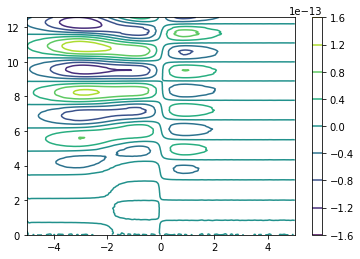

In [0]:
plt.contour(xgrid,tgrid,(X-recontructed.T).real)
plt.colorbar()

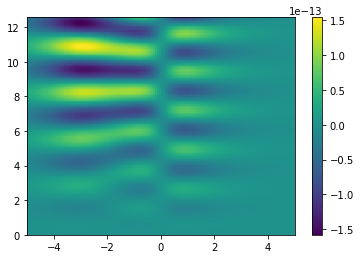

In [0]:
plt.pcolor(xgrid,tgrid,(X-recontructed.T).real)
plt.colorbar() 

#Advanced use of Dynamic Mode Decomposition- [2D]

- In detail, we will create a 2D dataset that oscillates in time 

- and we will focus on the parameters that allow to optimally tune

In [0]:
%matplotlib inline
import numpy as np
import scipy 
import scipy.integrate
from matplotlib import animation  #**worth noting
from IPython.display import HTML  #**worth noting
from matplotlib.pyplot import plot
from pydmd import DMD

![picture](https://drive.google.com/uc?id=1qrFG72zydCIUOXVNIMgw2QZQtPUPugye)




In [0]:
#defining x,y and time
x = np.linspace(-3,3,80)   
y = np.linspace(-3,3,80)
x_grid,y_grid = np.meshgrid(x,y)
time = np.linspace(0,6,16) 

In [0]:
data1 = []
for t in time:
  data = (1/(np.cosh(x_grid)*np.cosh(y_grid)))*(1.2j**-t)
  data1.append(data)

In [0]:
data1[0]

array([[0.00986604+0.j, 0.01064023+0.j, 0.01147441+0.j, ...,
        0.01147441+0.j, 0.01064023+0.j, 0.00986604+0.j],
       [0.01064023+0.j, 0.01147517+0.j, 0.01237482+0.j, ...,
        0.01237482+0.j, 0.01147517+0.j, 0.01064023+0.j],
       [0.01147441+0.j, 0.01237482+0.j, 0.01334499+0.j, ...,
        0.01334499+0.j, 0.01237482+0.j, 0.01147441+0.j],
       ...,
       [0.01147441+0.j, 0.01237482+0.j, 0.01334499+0.j, ...,
        0.01334499+0.j, 0.01237482+0.j, 0.01147441+0.j],
       [0.01064023+0.j, 0.01147517+0.j, 0.01237482+0.j, ...,
        0.01237482+0.j, 0.01147517+0.j, 0.01064023+0.j],
       [0.00986604+0.j, 0.01064023+0.j, 0.01147441+0.j, ...,
        0.01147441+0.j, 0.01064023+0.j, 0.00986604+0.j]])

In [0]:
data2 = [2/np.cosh(x_grid)/np.cosh(y_grid)*(1.2j**-t) for t in time]
data3 = [(1/(np.cosh(x_grid)*np.cosh(y_grid)))*(1.2j**-t) for t in time]  #data3 == data1

In [0]:
#data3[0]

In [0]:
#data2[0]

In [0]:
#adding random noise.....
noise = [np.random.normal(0.0, 0.4, size=x_grid.shape) for t in time]

In [0]:
#our snapshots...
snapshots = []
for d,n in zip(data2,noise):
  snap = d+n
  snapshots.append(snap)


- snapshots is a list containing 16- "80*80" complex matrices

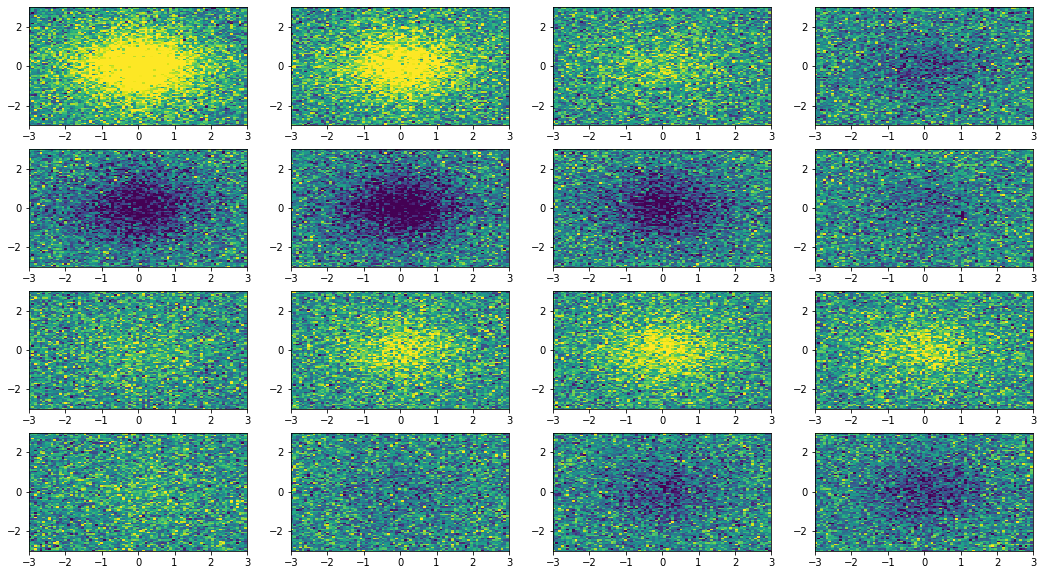

In [0]:
#plotting snapshots....
fig = plt.figure(figsize=(18,10))
for i,j in enumerate(snapshots,start=1): #starting index counting from "start=1"
  plt.subplot(4,4,i)
  plt.pcolor(x_grid,y_grid,j.real,vmin=-1,vmax=1)   #j == each snapshot

In [0]:
#emumerate output the content of the snapshot with index from "start=0" by default

- There are four optional parameters in pyDMD

- **svd_rank**: since the dynamic mode decomposition relies on singular value decomposition, we can specify the number of the largest singular values used to approximate the input data.


- **tlsq_rank**: using the total least square, *it is possible to perform a linear regression in order to remove the noise on the data*; because this regression is based again on the singular value decomposition, this parameter indicates how many singular values are used.


- **exact**: boolean flag that allows to chose between the exact modes or the projected one.


- **opt**: boolean flag that allows to chose between the standard version and the optimized one.

In [0]:
sys_DMD2 = DMD(svd_rank=0, tlsq_rank=2,exact=True, opt=True)   

- By setiing **svd_rank=0**, there will an automatic selection of the truncation rank

- As shown below, truncation rank was automatically selected as 5  

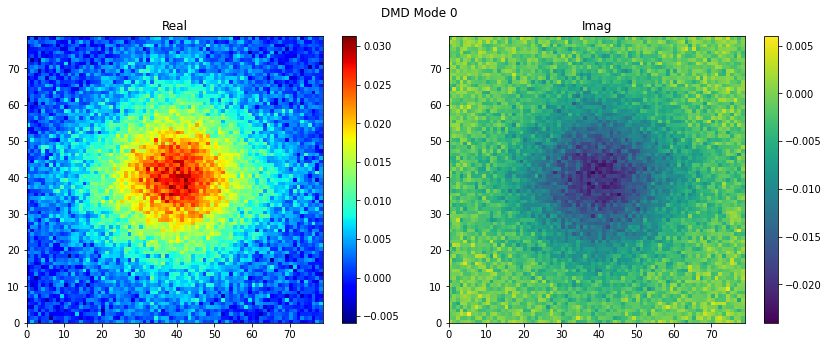

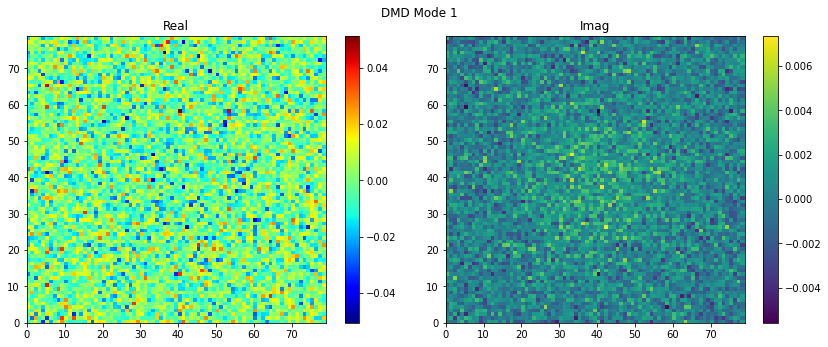

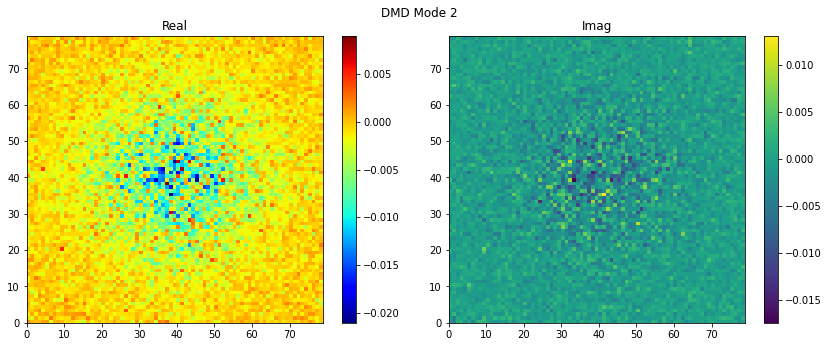

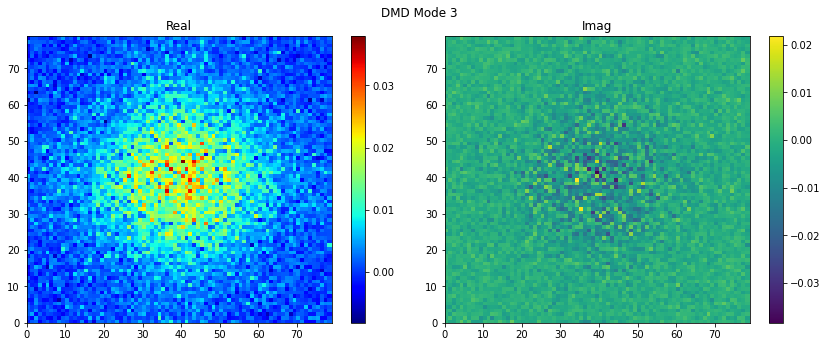

In [0]:
sys_DMD2.fit(snapshots)
sys_DMD2.plot_modes_2D(figsize=(12,5))

In [0]:
#The Eigvalues...
sys_DMD2.eigs

array([ 0.72255758-0.54609894j, -0.59754664+0.25987587j,
       -0.03068303-0.02440642j, -0.01946358-0.0009892j ,
        0.0193726 +0.01505779j])

In [0]:
#E1
E1 = sys_DMD2.eigs[0]
E2 = sys_DMD2.eigs[1]
E3 = sys_DMD2.eigs[2]
E4 = sys_DMD2.eigs[3]
E5 = sys_DMD2.eigs[4]

In [0]:
#checking the stability of the modes 
#evaluating distance of each eigenvaue from the unit circle
eigens = [E1,E2,E3,E4,E5]
for e in eigens:   #approximated
  print('Eigenvalue {}: distance from unit circle {}'.format(e, round(np.abs((e.imag**2+e.real**2)- 1),2)))

Eigenvalue (0.7225575781428127-0.5460989382855269j): distance from unit circle 0.18
Eigenvalue (-0.5975466436224192+0.2598758674150287j): distance from unit circle 0.58
Eigenvalue (-0.030683031892031143-0.024406418992500553j): distance from unit circle 1.0
Eigenvalue (-0.019463579500273307-0.000989197575175343j): distance from unit circle 1.0
Eigenvalue (0.019372603065422895+0.015057787175298386j): distance from unit circle 1.0


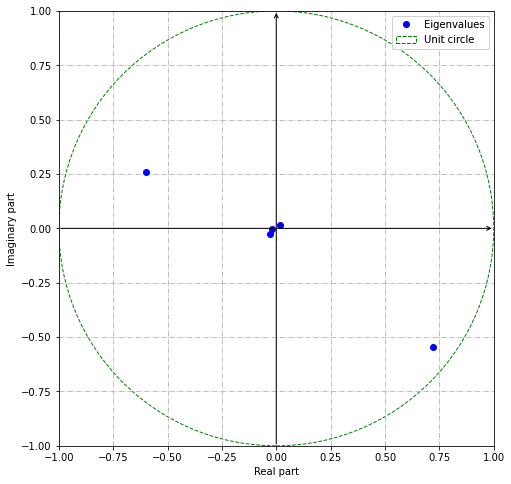

In [0]:
#using the "plot_eigs" 
sys_DMD2.plot_eigs(show_axes=True, show_unit_circle=True)  #plotting on a unit_circle

- As shown above, the system is not stable..

In [0]:
#checking the actual number of svd rank needed
s = np.array([snapshot.flatten() for snapshot in snapshots]).T
svd_snaps = scipy.linalg.svdvals(s)

In [0]:
s.shape

(6400, 16)

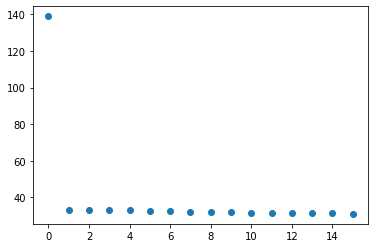

In [0]:
fig = plt.plot(svd_snaps,'o')

In [0]:
#ony 1-rank of SVD is required

In [0]:
snapshots[0].shape

(80, 80)

In [0]:
recontructed = sys_DMD2.reconstructed_data
recontructed.shape

(6400, 16)

In [0]:
x_grid.shape

(80, 80)

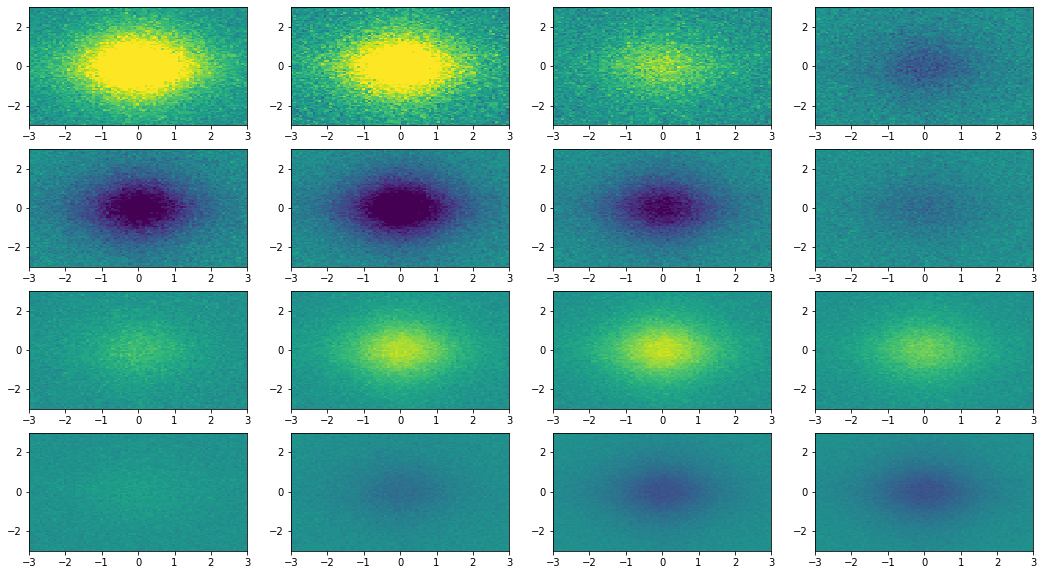

In [0]:
#plotting snapshots....
fig = plt.figure(figsize=(18,10))
for i,j in enumerate(recontructed.T,start=1): #starting index counting from "start=1"
  plt.subplot(4,4,i)
  plt.pcolor(x_grid,y_grid,j.reshape(x_grid.shape).real,vmin=-1,vmax=1)     #j == each snapshot

- Now the cool trick: we combine the reconstructed dataset to create an animation that shows the evolution of our system.

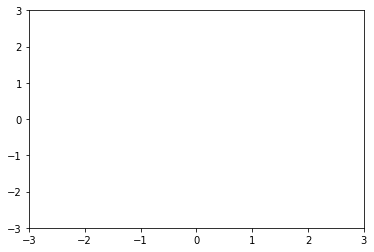

In [0]:
fig = plt.figure()
DMD_States = [s.reshape(x_grid.shape) for s in sys_DMD2.reconstructed_data.T]
frames = [[plt.pcolor(x_grid,y_grid,s.real,vmin=-1,vmax=1)] for s in DMD_States]
ani = animation.ArtistAnimation(fig,frames,interval=1000,blit=False,repeat=False)
HTML(ani.to_html5_video())

- Checking the accuracy of the reconstruction;

- By plotting the integral computed on the original snapshots and on the DMD states.

- Manipulation of the interval between the **approximated states** and extend the temporal window where the data is reconstructed

In [0]:
print("Shape before manipulation: {}".format(sys_DMD2.reconstructed_data.shape))
sys_DMD2.dmd_time['dt'] *= .25
sys_DMD2.dmd_time['tend'] *= 3
print("Shape after manipulation: {}".format(sys_DMD2.reconstructed_data.shape))

Shape before manipulation: (6400, 16)
Shape after manipulation: (6400, 181)


In [0]:
sys_DMD2.dmd_time

{'dt': 0.25, 't0': 0, 'tend': 45}

In [0]:
#The DMD timesteps
DMD_timesteps = sys_DMD2.dmd_timesteps
DMD_timesteps.shape

(181,)

In [0]:
#using integral from "scipy"
integral = scipy.integrate.trapz

In [0]:
DMD_States = [s.reshape(x_grid.shape) for s in sys_DMD2.reconstructed_data.T]

In [0]:
DMD_integral = []
for s in DMD_States:
  i = integral(integral(s)).real
  DMD_integral.append(i) 

len(DMD_integral)  #which is same as the DMD -timesnap lenght  

181

In [0]:
original_integral = []
for snaps in snapshots:
  i = integral(integral(snaps)).real
  original_integral.append(i) 

#original_int = [integral(integral(snaps)).real for snaps in snapshots] --> in 1-line loop 

In [0]:
len(original_integral)

16

In [0]:
#DMD_original_timesteps....return "t".....
Original_timesteps = sys_DMD2.original_timesteps
len(Original_timesteps)

16

In [0]:
#dmd_int = [integral(integral(state)).real for state in DMD_States]

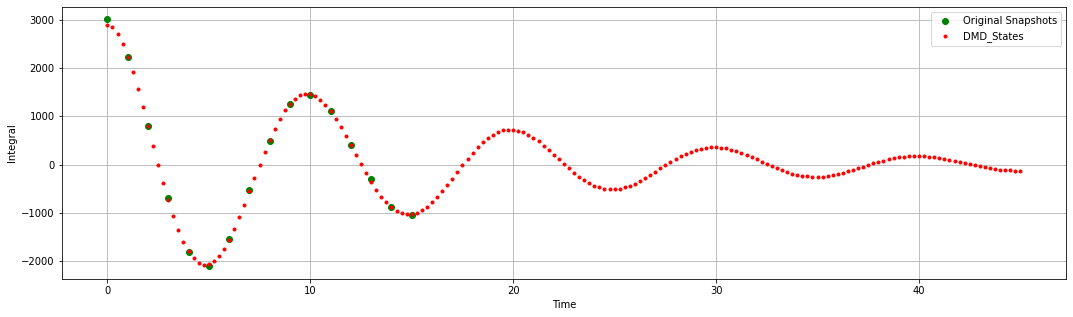

In [0]:
fig = plt.figure(figsize=(18,5))
plt.plot(Original_timesteps,original_integral,'go',label="Original Snapshots")
plt.plot(DMD_timesteps,DMD_integral,'r.',label="DMD_States")
plt.ylabel("Integral")
plt.xlabel("Time")
plt.grid()
plt.legend()

#Compressed DMD  --[CDMD]

- The snapshots matrix is first compressed through a pre-multiplication by a proper matrix, 

- and then the compressed matrix is decomposed.

- [link-Compressed DMD](https://link.springer.com/article/10.1007/s11554-016-0655-2#Sec6)

In [0]:
import time
from pydmd import CDMD

In [0]:
#A function to create Dataset...   
#def create_dataset(x_dim,t_dim):   
def f1(x,t):
  return np.exp((-x**2)/5)*np.cos(4*x)*np.exp(2.3j*t)

def f2(x,t):
  return (1-np.exp(1-(x**2)/6))*np.exp(1.3j*t)

def f3(x,t):
  return ((-x**2/50) + 1)*(1.1j)**(-2*t)   

x = np.linspace(-5,5,256)
t = np.linspace(0,4*np.pi,128)

xGrid,tGrid = np.meshgrid(x,t)
X1 = f1(xGrid,tGrid)
X2 = f2(xGrid,tGrid)
X3 = f3(xGrid,tGrid)
X  = X1 + X2 + X3

<function matplotlib.pyplot.show>

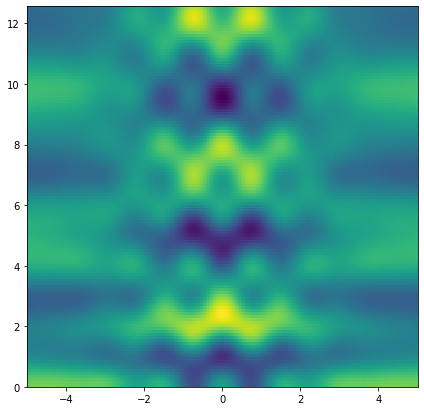

In [0]:
#plotiing the dataset Above....
plt.figure(figsize=(7,7))
plt.pcolor(xGrid,tGrid,X.real)
plt.show

- In order to compress the dataset, we need to build the matrix that premultiplies the snapshots matrix. 

- The class CDMD provides the following prebuilt matrices:i.e, we can choose any of the following matrices as the compression matrix in CDMD

- **normal**: a matrix with dimension (nsnaps, ndim) where the elements are randomly generated with normal distribution with mean equal to 0.0 and standard deviation equal to 1.0;

- **uniform**: a matrix with dimension (nsnaps, ndim) where the elements are randomly generated with uniform distribution between 0 and 1;

- **sparse**: a random sparse matrix with dimension (nsnaps, ndim);

- **sample**: a matrix with dimension (nsnaps, ndim) where each row contains an element equal to 1 and all the other elements are null.

- It is also possible to build our custom matrix for the compression as shown;

In [0]:
Matrix_snapshots = X.T
Matrix_snapshots.shape

(256, 128)

In [0]:
Matrix_snapshots.shape[0]

256

In [0]:
#creating a random matrix 
random_mat = np.random.permutation(256*128)

In [0]:
random_mat.shape

(32768,)

In [0]:
#Reshaping the created random_matrix
random_mat = random_mat.reshape(128,256)

In [0]:
random_mat.shape

(128, 256)

In [0]:
#creating a compression matrix...
compression_matrix = random_mat / np.linalg.norm(random_mat)

In [0]:
compression_matrix.shape

(128, 256)

- using the compressed DMD with the "custom compression matrix created above

In [0]:
#firstly checking the number of SVD ranks needed in the DMD

In [0]:
s = np.array([snapshot.flatten() for snapshot in Matrix_snapshots]).T
svd_snaps = scipy.linalg.svdvals(s)

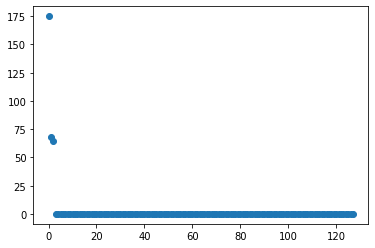

In [0]:
fig = plt.plot(svd_snaps,'o')

In [0]:
#fitting the compressed DMD....
DMD_compressed = CDMD(svd_rank=3,compression_matrix=compression_matrix)
DMD_compressed.fit(Matrix_snapshots)

- 3 SVD ranks are needed as shown above;

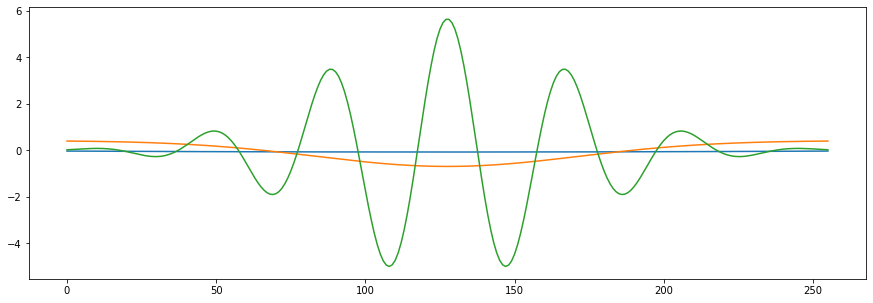

In [0]:
plt.figure(figsize=(15,5))
#plt.subplot(1,2,1)
plt.plot(DMD_compressed.modes.real)
plt.show()

- Now plotting the **modes** and **dynamics** 

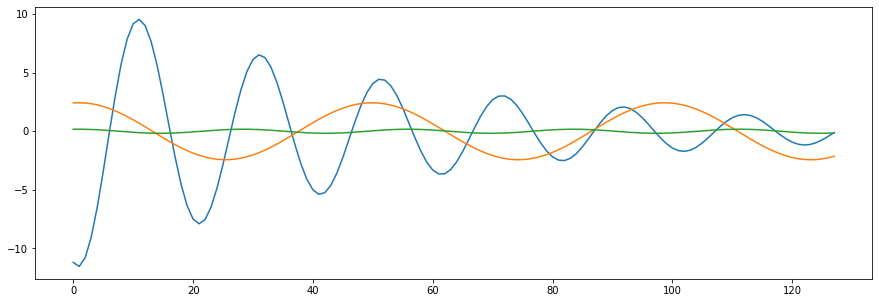

In [0]:
plt.figure(figsize=(15,5))
plt.plot(DMD_compressed.dynamics.T.real)
plt.show()

- Evaluation of the reconstruction Accuracy 

- Comparison of "standard_DMD" and "compressed_DMD"

In [0]:
#stadard on "Matrix Snapshots..."
DMD_standard = DMD(svd_rank=3,exact=True)
DMD_standard.fit(Matrix_snapshots)

In [0]:
reconstructed_DMD = DMD_standard.reconstructed_data
reconstructed_CDMD = DMD_compressed.reconstructed_data

In [0]:
DMD_error = np.linalg.norm(Matrix_snapshots - reconstructed_DMD)
CDMD_error = np.linalg.norm(Matrix_snapshots - reconstructed_CDMD)

In [0]:
print("DMD error: {}".format(DMD_error))
print("CDMD error: {}".format(CDMD_error))

DMD error: 1.1955917175850393e-11
CDMD error: 7.827368559421136e-12


- The error using the compressed input is slightly greater,

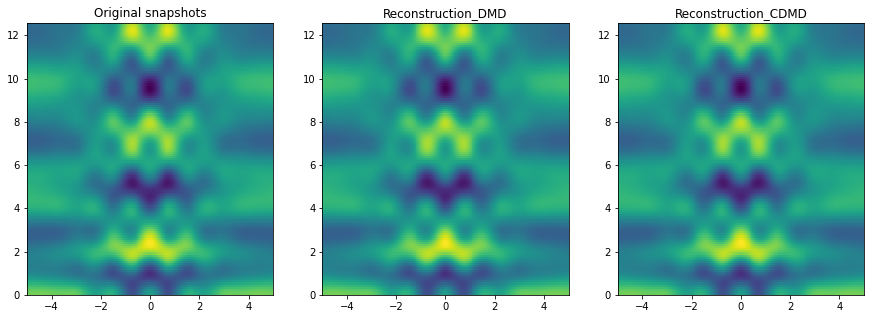

In [0]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Original snapshots")
plt.pcolor(xGrid,tGrid,Matrix_snapshots.real.T)



plt.subplot(1,3,2)
plt.title("Reconstruction_DMD")
plt.pcolor(xGrid,tGrid,reconstructed_DMD.real.T)



plt.subplot(1,3,3)
plt.title("Reconstruction_CDMD")
plt.pcolor(xGrid,tGrid,reconstructed_CDMD.real.T)

- The reconstruction looks very similar to the orignal input. 
 
- why we need the compressed algorithm instead of the original one?
 
- the snapshots_matrix without compression has dimension **n_dim  ×  n_snapshots**,

-  where *n_dim = the dimension of each snapshots* 
- and *n_snapshots = the number of snapshots*

- The compressed snapshots matrix is instead a **n_snapshots × n_snapshots** matrix; 

- so, over a userful noise reduction due to the compression

- this version allows a faster computation. Let's measure it.

In [0]:
time_dmd = []
time_cdmd = []
dim = []

n_iter = 4
n_dims = 10**np.arange(2,2+n_iter)
n_snaps = [100]*n_iter

# Higher Order DMD on low dimensional snapshots 

- [link to Higher Order DMD](https://epubs.siam.org/doi/10.1137/15M1054924)

-  This method allows to apply the DMD also when the *dimension of the snapshots is less than the number of snapshots*

In [0]:
from pydmd import HODMD

![alt text](https://drive.google.com/uc?id=1-oXJfs2ZJsJkWY8HPGxkE9gguLou0eXd)

In [0]:
def func(x):
  snapshots_1D = np.cos(x)*np.sin(np.cos(x)) + np.cos(x/5)
  return snapshots_1D

In [0]:
x = np.linspace(0,10,64)
snapshots_1D = func(x)

In [0]:
snapshots_1D.shape

(64,)

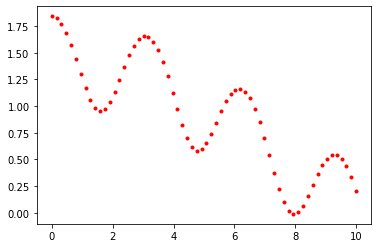

In [0]:
plt.plot(x,snapshots_1D,'r.')
plt.show()

- Higher Order DMD has the parameter *d* which allows the initial snapshots matrix to be  rearranged in order to be able to extract the main structures using the singular value decomposition.

In [0]:
# #checking the actual number of svd rank needed
# s = np.array([snapshot.flatten() for snapshot in snapshots_1D]).T
# svd_snaps = scipy.linalg.svdvals(s)

# fig = plt.plot(svd_snaps,'o')

In [0]:
h_ODMD = HODMD(svd_rank=0,exact=True,opt=True,d=30)
h_ODMD.fit(snapshots_1D)

In [0]:
h_ODMD.reconstructed_data.shape

(1, 64)

-Checking system stability via Eigen plot

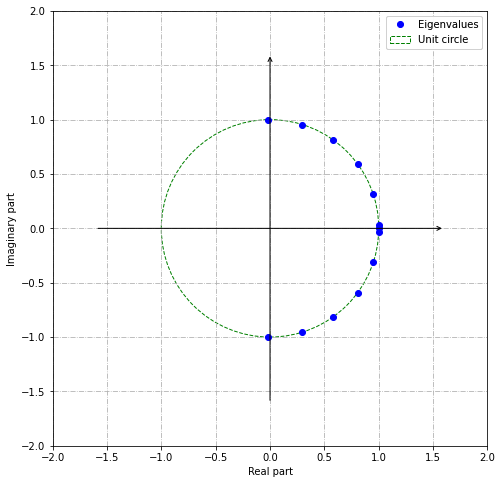

In [0]:
h_ODMD.plot_eigs()

In [0]:
h_ODMD.original_time['dt'] = h_ODMD.dmd_time['dt'] = x[1] - x[0]
h_ODMD.original_time['t0'] = h_ODMD.dmd_time['t0'] = x[0]
h_ODMD.original_time['tend'] = h_ODMD.dmd_time['tend'] = x[-1]

In [0]:
original_Tsteps = h_ODMD.original_timesteps
DMD_Tsteps = h_ODMD.dmd_timesteps

In [0]:
reconstructed_HODMD = h_ODMD.reconstructed_data

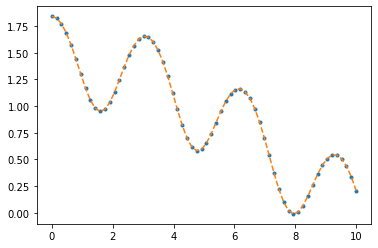

In [0]:
plt.plot(original_Tsteps,snapshots_1D,'.',label='snapshots')
plt.plot(DMD_Tsteps,reconstructed_HODMD[0].real,'--',label='DMD_Output')